<br>

##### IMAGE PROCESSING

<br>


<br>

This is an atempt to see if we can solve some of the common image processing problems by just using the Numpy library.

Some common image processing that can be done on an image are:

1. Grayscaling
2. Cropping
3. Computing pixel ranges
4. Maximizing the contrast
5. Flipping
6. Normalizing
7. Resizing

<br>

In [30]:
# ----- Importing the numpy library ----- 


import numpy as np

In [18]:
# ----- 1. Function that takes in any image and
# returns a grayscale one ----- 


def convert_to_grayscale(im):
    '''
    Converts an (nxmx3) color image im into a (nxm) grayscale image.
    '''
    
    grayscale_image = np.dot(im[..., :3], [0.299, 0.587, 0.144])
    return grayscale_image



# Reference: https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

In [19]:
# ----- 2. Function that takes in any image &
# the crop bounds and return a cropped image ----- 


def crop_image(im, crop_bounds):
    '''
    Returns a cropped image, im_cropped. 
    im = numpy array representing a color or grayscale image.
    crops_bounds = 4 element long list containing the top, bottom,
    left, and right crops respectively. 

    e.g. if crop_bounds = [50, 60, 70, 80], the returned image
    should have 50 pixels removed from the top, 
    60 pixels removed from the bottom, and so on. 
    '''
    
    im_cropped = im[crop_bounds[1]:crop_bounds[3]+crop_bounds[0],crop_bounds[0]:crop_bounds[2]+crop_bounds[1],:]
    # Left-Up-Right-Bottom im_cropped = im[crop_bounds[1]:-crop_bounds[3], crop_bounds[0]:-crop_bounds[2], :]
    # Top-Down-Left-Right im_cropped = im[crop_bounds[0]:-crop_bounds[1], crop_bounds[2]:-crop_bounds[3], :]
    return im_cropped

In [20]:
# ----- 3. Function that takes in any image &
# returns the range difference in all the 3 color channels ----- 


def compute_range(im):
    '''
    Returns the difference between the largest and smallest pixel values.
    '''
    
    image_range = []
    image_range.append(im[:, :, 0].max() - im[:, :, 0].min())
    image_range.append(im[:, :, 1].max() - im[:, :, 1].min())
    image_range.append(im[:, :, 2].max() - im[:, :, 2].min())
    return image_range

In [21]:
# ----- 4. Function that takes in any image &
# a target range to return a maximum contrast image  ----- 


def maximize_contrast(im, target_range = [0, 255]):
    '''
    Return an image over same size as im that has been "contrast maximized"
    by rescaling the input image so that the smallest pixel value is mapped to
    target_range[0], and the largest pixel value is mapped to target_range[1]. 
    '''

    
    image_adjusted = ((im - im.min()) * ((target_range[1] - target_range[0]) // (im.max() - im.min()))) + target_range[0]
    # image_adjusted = ((im - im.min()) // (im.max() - im.min())) * (target_range[1] - target_range[0])
    return image_adjusted


# Reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm

In [22]:
# ----- 5. Function that takes in any image &
# the direction & returns a flipped image ----- 


def flip_image(im, direction = 'vertical'):
    '''
    Flip image along direction indicated by the direction flag. 
    direction = vertical or horizontal.
    '''
    
    if direction == 'vertical':
        flipped_image = np.flipud(im)
    else:
        flipped_image = np.fliplr(im)
    return flipped_image

In [23]:
# ----- 6. Function that takes in any image & the threshold given and
# returns count of pixel values above threshold ----- 


def count_pixels_above_threshold(im, threshold):
    '''
    Return the number of pixels with values above threshold.
    '''
    
    pixels_above_threshold = np.count_nonzero(im[im>threshold])
    return pixels_above_threshold

In [24]:
# ----- 6. Function that takes in any image & the threshold given and
# returns count of pixel values above threshold ----- 


def normalize(im):
    '''
    Rescale all pixels value to make the mean pixel value equal zero
    and the standard deviation equal to one. 
    if im is of type uint8, convert to float.
    '''

    normalized_image = im.astype('float64')
    normalized_image = ((normalized_image - normalized_image.min())) / (normalized_image.max() - normalized_image.min())
    return normalized_image

<br>

##### DATA VISUALIZATION

Now that we've written all our function, it's time to see if they pass the test.
An image is stored in the folder of this .ipynb file which we'll read into this file
and apply all the functions on it. To see if the functions are doing what we want them to do,
we'll plot the resultant images using Python's matplotlib library.

<br>

In [10]:
# ----- Importing matplotlib to see if our functions
# perform what is required of them -----


from matplotlib.pyplot import *


# ----- iPython magic function to make plots appear inline in the notebook -----

%matplotlib inline

In [16]:
# ----- Reading the image -----


im = imread('messi.jpg')

In [7]:
im.shape

(562, 1000, 3)

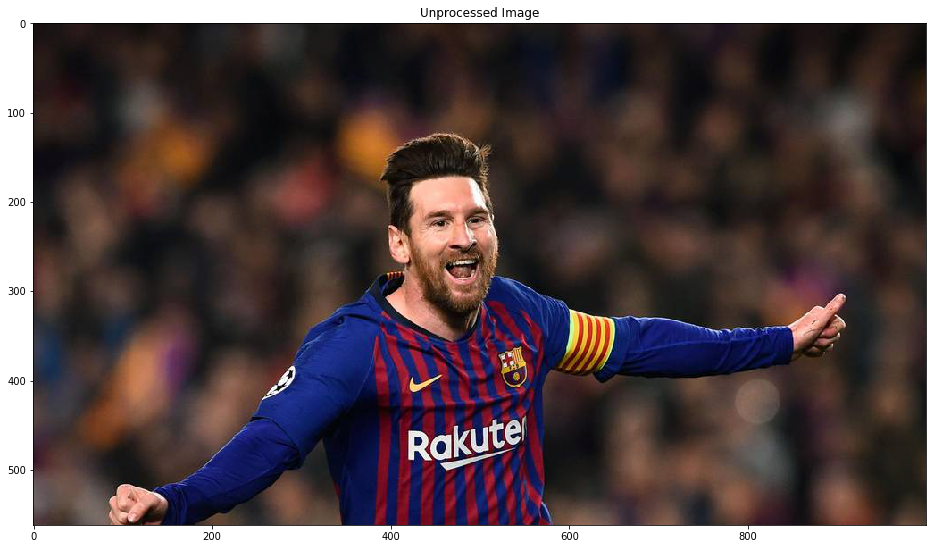

In [46]:
# --- Let's see how our image looks like ---


fig = figure(0, (16,16))
title('Unprocessed Image')
imshow(im)

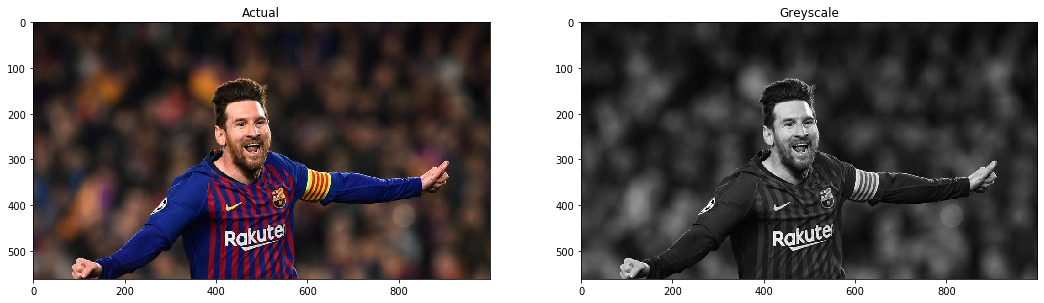

In [44]:
# ----- Let's go ahead and use the first function we created &
# greyscale the image -----


fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
title('Actual')
imshow(im)

fig.add_subplot(1,2,2)
title('Greyscale')
imshow(convert_to_grayscale(im), cmap='gray')

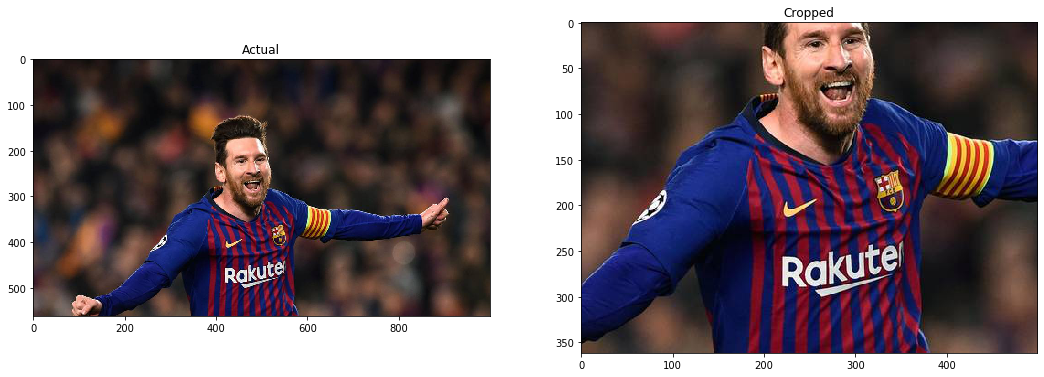

In [43]:
# ----- Let's crop the image now -----


fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
title('Actual')
imshow(im)

fig.add_subplot(1,2,2)
title('Cropped')
imshow(crop_image(im, [200,200,500,500]))

In [34]:
# ----- Let's use the compute range function ----- 


compute_range(im)

[255, 255, 255]

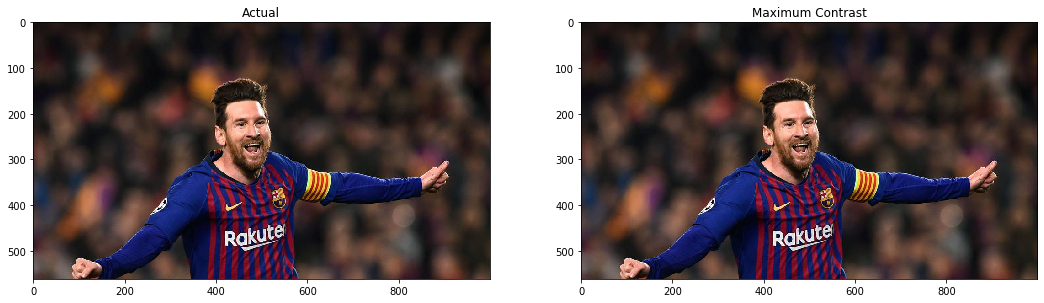

In [42]:
# ----- Maximizing image contrast -----


fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
title('Actual')
imshow(im)

fig.add_subplot(1,2,2)
title('Maximum Contrast')
imshow(maximize_contrast(im, [0, 255]))

The image is already a very contrasting one and hence we don't see any changes.

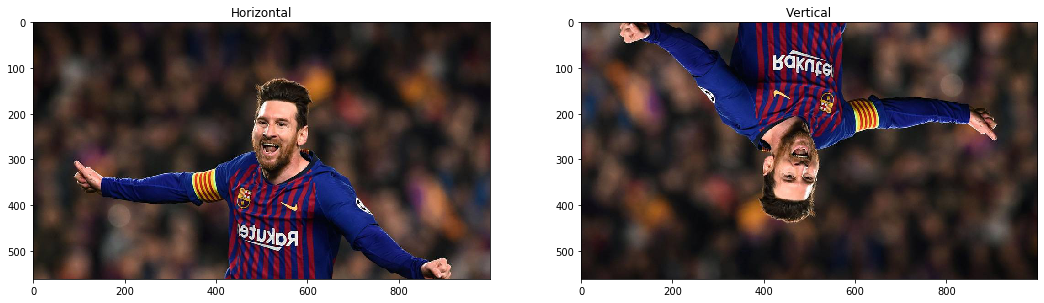

In [40]:
# ----- Flipping -----


fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
title('Horizontal')
imshow(flip_image(im, direction = 'horizontal'))

fig.add_subplot(1,2,2)
title('Vertical')
imshow(flip_image(im, direction = 'vertical'))

In [47]:
# ----- Counting pixels above a threshold of 180 -----


count_pixels_above_threshold(im, 180)

31401

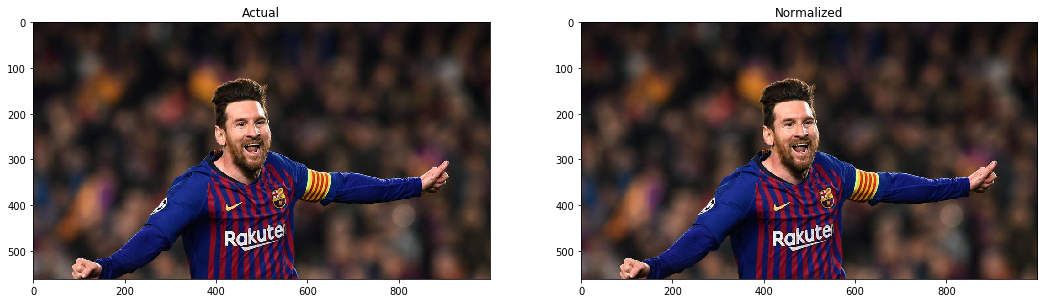

In [48]:
# ----- Normalizing -----


fig = figure(0, (18, 9))
fig.add_subplot(1,2,1)
title('Actual')
imshow(im)

fig.add_subplot(1,2,2)
title('Normalized')
imshow(normalize(im))